
# KNN - K Nearest Neighbours Modeli





Bu dersimizde Machine Learning modellerinden KNN Modelini Python'da şeker hastalığı veri setini örneğiyle uygulamalı olarak öğreneceğiz.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Outcome = 1 Diabet/Şeker Hastası
# Outcome = 0 Sağlıklı
data = pd.read_csv("diabetes.csv")
data.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


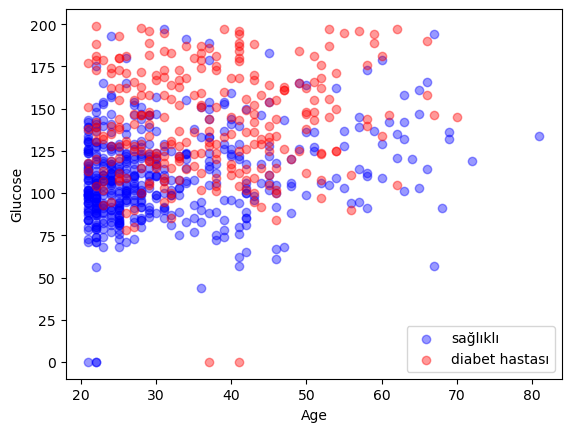

In [2]:


seker_hastalari = data[data.Outcome == 1]
saglikli_insanlar = data[data.Outcome == 0]


# Şimdilik sadece gloucose'a bakarak örnek bir çizim yapalım:
# Programımızın sonunda makine öğrenme modelimiz sadece glikoza değil tüm diğer verilere bakarak bir tahmin yapacaktır..
plt.scatter(saglikli_insanlar.Age, saglikli_insanlar.Glucose, color="blue", label="sağlıklı", alpha = 0.4)
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color="red", label="diabet hastası", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()


In [3]:


# x ve y eksenlerini belirleyelim
y = data.Outcome.values
x_ham_veri = data.drop(["Outcome"],axis=1)   
# Outcome sütununu(dependent variable) çıkarıp sadece independent variables bırakıyoruz
# Çüknü KNN algoritması x değerleri içerisinde gruplandırma yapacak..


# normalization yapıyoruz - x_ham_veri içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz
# Eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamları ezer ve KNN algoritmasını yanıltabilir!
x = (x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

# önce
print("Normalization öncesi ham veriler:\n")
print(x_ham_veri.head())


# sonra 
print("\n\n\nNormalization sonrası yapay zekaya eğitim için vereceğimiz veriler:\n")
print(x.head())
    



Normalization öncesi ham veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



Normalization sonrası yapay zekaya eğitim için vereceğimiz veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [6]:

# train datamız ile test datamızı ayırıyoruz
# train datamız sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullanılacak
# test datamız ise bakalım makine öğrenme modelimiz doğru bir şekilde hasta ve sağlıklı insanları ayırt edebiliyor mu diye 
# test etmek için kullanılacak...
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=1)

# knn modelimizi oluşturuyoruz.
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("K=3 için Test verilerimizin doğrulama testi sonucu ", knn.score(x_test, y_test))


K=3 için Test verilerimizin doğrulama testi sonucu  0.8311688311688312


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [7]:




# k kaç olmalı ?
# en iyi k değerini belirleyelim..
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print(sayac, "  ", "Doğruluk oranı: %", knn_yeni.score(x_test,y_test)*100)
    sayac += 1
    
    

1    Doğruluk oranı: % 71.42857142857143
2    Doğruluk oranı: % 71.42857142857143
3    Doğruluk oranı: % 83.11688311688312
4    Doğruluk oranı: % 80.51948051948052
5    Doğruluk oranı: % 81.81818181818183
6    Doğruluk oranı: % 83.11688311688312
7    Doğruluk oranı: % 80.51948051948052
8    Doğruluk oranı: % 80.51948051948052
9    Doğruluk oranı: % 79.22077922077922
10    Doğruluk oranı: % 79.22077922077922


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [8]:
# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler

# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)

new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1